# The Laplace Equation

The Laplace equation is one of the canonical partial differential equationss with which numericists deal, and an example of an elliptic PDE. As you probably know, the equation for a parabola is

\\[ a^2 x^2 + b^2 y^2=r. \\]
 
Similar to this, the standard Laplace equation in two dimension is

\\[ \frac{\partial^2 u}{\partial x^2} +\frac{\partial ^2 u}{\partial y^2}=f(x,y). \\]
 
This is a model for a steady system in which information diffused through the domain boundaries balances sources and sinks within the domain itself.

## Boundary conditions

The problem accepts several classes of boundary condition and remains well posed, however a condition of some sort is needed on every boundary. Some possible forms for the boundary condition are

1. Dirichlet conditions: Here we specify the explicit value of \\(u\\) on the boundary itself, 
\\[u(x,y)=U_D \quad (x,y)\in \delta\Omega. \\] 
2. Neumann conditions: here we specify the rate of change of u in the direction \\(\mathbf{n}\\) normal to the boundary,
\\[\mathbf{n}\cdot \nabla u(x,y)=g_N \quad (x,y)\in \delta\Omega.\\] 
3. Robin conditions: Here the condition is an equation relating the value of the boundary and its rate of change in the normal direction
\\[u(x,y)+a\mathbf{n}\cdot \nabla u(x,y)=g_N \quad (x,y)\in \delta\Omega.\\] 

Lets implement a quick finite difference solver for Laplace's equation using `numpy` and `scipy`.

### Numbering

Our domain is two dimensional, but we need one dimensional vectors to do maths with, so we need to come up with a mapping from an index pair, \\((i,j)\\) to a single index, \\(k\\). This can be done two different ways, \\((k=N*i+j)\\) and \\((k=N*j+i)\\). Which one is natural depends on a number of things

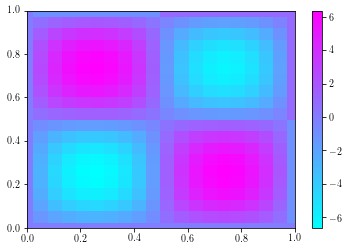

In [9]:
import numpy
from scipy import linalg

N = 20
dx = 1.0/(N-1)

x = numpy.linspace(-dx/2., 1.0+dx/2., N+1)
A = numpy.zeros([N*N, N*N])
f = numpy.zeros([N, N])

f[1:N//2,1:N//2]=1.0
f[N//2:N,1:N//2]=-1.0
f[1:N//2,N//2:N]=-1.0
f[N//2:N,N//2:N]=1.0

for j in range(N):
    A[j,j] = 1.0
    A[N*(N-1)+j,N*(N-1)+j] = 1.0
for i in range(1,N-1):
    A[N*i,N*i] = 1.0
    for j in range(1,N-1):
        A[N*i+j, N*(i+1)+j] =1.0
        A[N*i+j, N*(i-1)+j] =1.0
        A[N*i+j, N*i+j+1] =1.0
        A[N*i+j, N*i+j-1] =1.0
        A[N*i+j, N*i+j] = -4.0
    A[N*i+N-1, N*i+N-1] = 1.0

u = linalg.solve(A, f.ravel()).reshape(N, N)

import pylab
pylab.cool()
pylab.pcolormesh(x, x, u)
pylab.axis([0,1,0,1], shading='gouraud')
pylab.colorbar()
pylab.show()


